# Setup and cleanup

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
import pandas as pd

choco_full = pd.read_csv('./datasets_1919_3310_flavors_of_cacao.csv')
choco_full.tail()

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
1790,Zotter,Peru,647,2011,70%,Austria,3.75,,Peru
1791,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781,2011,62%,Austria,3.25,,India
1794,Zotter,"Brazil, Mitzi Blue",486,2010,65%,Austria,3.00,,Brazil


In [5]:
# choco_full.info()

## Cleanup the column names

In [72]:
choco_full[choco_full['Bean\nType']=='\xa0'].count()

Company \n(Maker-if known)           887
Specific Bean Origin\nor Bar Name    887
REF                                  887
Review\nDate                         887
Cocoa\nPercent                       887
Company\nLocation                    887
Rating                               887
Bean\nType                           887
Broad Bean\nOrigin                   887
dtype: int64

In [4]:
choco_clean = choco_full.rename(columns={'Company\xa0\n(Maker-if known)': 'company', 'Specific Bean Origin\nor Bar Name': 'origin', 
                                        'REF': 'ref', 'Review\nDate': 'review_date', 'Cocoa\nPercent': 'cocoa_percent', 
                                        'Company\nLocation': 'company_location', 'Rating': 'rating', 'Bean\nType': 'bean_type', 
                                        'Broad Bean\nOrigin': 'bean_origin'})
choco_clean.head()

,company,origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,bean_origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


## Cleanup the null values

In [5]:
choco_clean.replace(u'\xa0','None', regex=True, inplace=True)
choco_clean = choco_clean.fillna('None')

In [6]:
choco_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company           1795 non-null   object 
 1   origin            1795 non-null   object 
 2   ref               1795 non-null   int64  
 3   review_date       1795 non-null   int64  
 4   cocoa_percent     1795 non-null   object 
 5   company_location  1795 non-null   object 
 6   rating            1795 non-null   float64
 7   bean_type         1795 non-null   object 
 8   bean_origin       1795 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


In [7]:
choco_clean.tail()

,company,origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,bean_origin
1790,Zotter,Peru,647,2011,70%,Austria,3.75,None,Peru
1791,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781,2011,62%,Austria,3.25,None,India
1794,Zotter,"Brazil, Mitzi Blue",486,2010,65%,Austria,3.00,None,Brazil


## Cleanup cocoa percent

In [8]:
cp = choco_clean['cocoa_percent'].str.replace('%', '')
choco_clean['cocoa_percent'] = cp.astype(float)
choco_clean.tail()

,company,origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,bean_origin
1790,Zotter,Peru,647,2011,70.0,Austria,3.75,None,Peru
1791,Zotter,Congo,749,2011,65.0,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65.0,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781,2011,62.0,Austria,3.25,None,India
1794,Zotter,"Brazil, Mitzi Blue",486,2010,65.0,Austria,3.00,None,Brazil


In [9]:
choco_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company           1795 non-null   object 
 1   origin            1795 non-null   object 
 2   ref               1795 non-null   int64  
 3   review_date       1795 non-null   int64  
 4   cocoa_percent     1795 non-null   float64
 5   company_location  1795 non-null   object 
 6   rating            1795 non-null   float64
 7   bean_type         1795 non-null   object 
 8   bean_origin       1795 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 126.3+ KB


# Data Analysis

## Number of unique values for each feature

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

cols = choco_clean.columns
for e in cols:
    print('%s: %d' %(e, choco_clean[e].nunique()))

company: 416
origin: 1039
ref: 440
review_date: 12
cocoa_percent: 45
company_location: 60
rating: 13
bean_type: 41
bean_origin: 100


## Average rating per location (country)

In [11]:
cols = choco_clean.company_location.unique()
avg_ratings = {}
for e in cols:
    num_company = choco_clean[choco_clean.company_location==e].company.nunique()
    avg_rating = choco_clean[choco_clean.company_location==e].rating.mean()
    num_ratings = choco_clean[choco_clean.company_location==e].rating.count()
    avg_ratings[e] = [avg_rating, num_company, num_ratings]

rating_table = pd.DataFrame.from_dict(avg_ratings, orient='index', columns=['Average rating', 
                                                                            'Number of companies', 
                                                                            'Number of ratings'])
rating_table = rating_table.sort_values('Average rating')
rating_table

,Average rating,Number of companies,Number of ratings
India,2.500000,1,1
Puerto Rico,2.625000,3,4
South Africa,2.666667,2,3
Mexico,2.687500,3,4
Czech Republic,2.750000,1,1
Portugal,2.750000,1,3
Martinique,2.750000,1,1
Ghana,2.750000,1,1
Wales,2.750000,1,1
Niacragua,2.750000,1,1


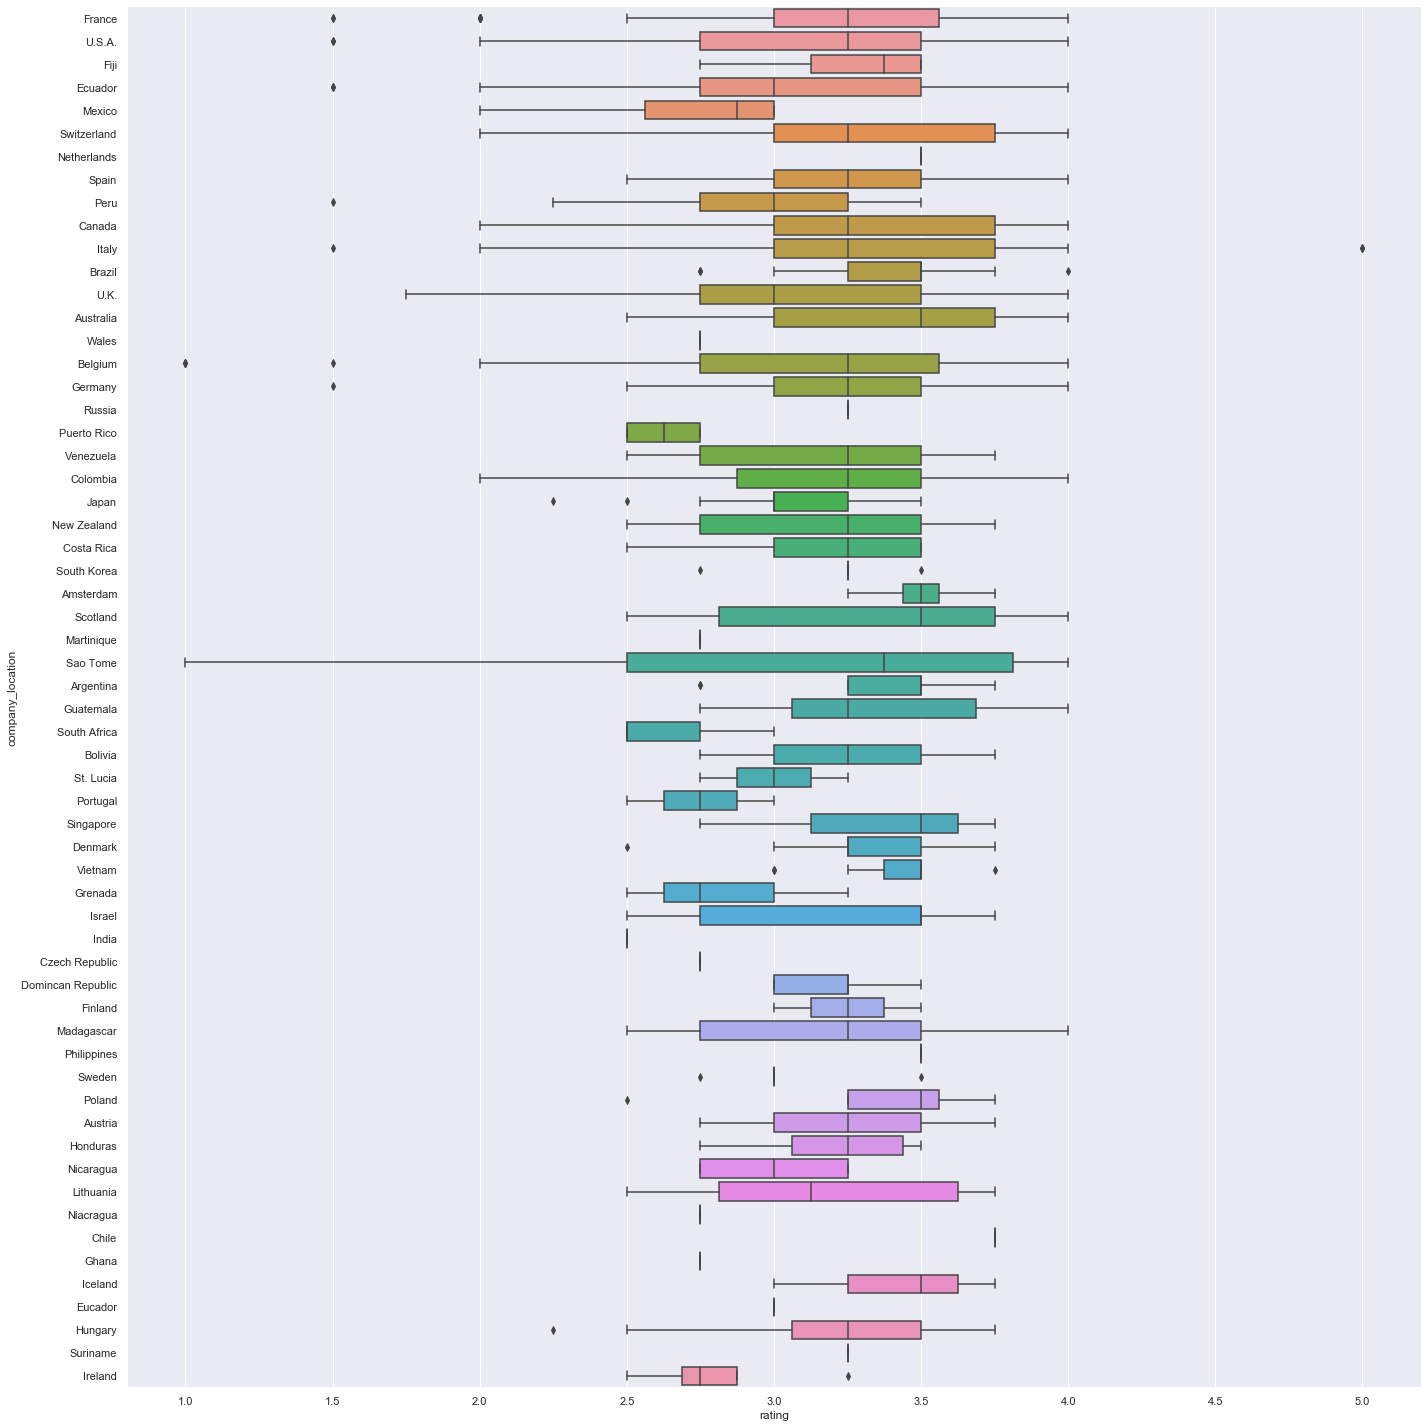

In [12]:
sns.catplot(x='rating', y='company_location', kind='box', data=choco_clean, height=20)

In [13]:
# plt.rcParams.update({'figure.max_open_warning': 0})
# cols = choco_clean.company_location.unique()
# ratings = {}
# for e in cols:
#     if choco_clean[choco_clean.company_location==e].rating.count() > 1:
#         all_ratings = choco_clean[choco_clean.company_location==e].rating.values
#         ratings[e] = all_ratings
#     #     print('%s: %s' %(e, all_ratings))
#         plt.figure()
#         sns.distplot(all_ratings, kde=False)
#         plt.title(e)

## Average rating per company

In [14]:
companies = choco_clean.company.unique()
avg_ratings2 = {}
for e in companies:
    avg_rating = choco_clean[choco_clean.company==e].rating.mean()
    num_ratings = choco_clean[choco_clean.company==e].rating.count()
    avg_ratings2[e] = [avg_rating, num_ratings]

rating_table2 = pd.DataFrame.from_dict(avg_ratings2, orient='index', columns=['Average rating', 'Number of ratings'])
rating_table2 = rating_table2.sort_values('Average rating')
rating_table2

,Average rating,Number of ratings
Cote d' Or (Kraft),1.000000,1
Callebaut,1.875000,2
Machu Picchu Trading Co.,1.875000,2
Jacque Torres,2.000000,1
Love Bar,2.000000,1
...,...,...
Matale,3.812500,4
Amedei,3.846154,13
Heirloom Cacao Preservation (Zokoko),3.875000,2
Ocelot,3.875000,2


## Average rating by bean type and percentage of cocoa

In [15]:
choco_clean.head()

,company,origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,bean_origin
0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,None,Sao Tome
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,None,Togo
2,A. Morin,Atsane,1676,2015,70.0,France,3.00,None,Togo
3,A. Morin,Akata,1680,2015,70.0,France,3.50,None,Togo
4,A. Morin,Quilla,1704,2015,70.0,France,3.50,None,Peru


# Most Popular Bean Types

With so many different companies and locations, this section will simplify chocolate bar ratings and only look at the four most popular bean types: criollo, trinitario, forastero and forastero (nacional). First, start by getting all the unique data types and how many of each there are in the data set.

In [16]:
beans = choco_clean.bean_type.unique()
beans

bean_table = {}

for b in beans:
    bean_table[b] = choco_clean[choco_clean.bean_type==b].bean_type.count()
    
bean_table = pd.DataFrame(bean_table.items(), columns=['Type', 'Amount']).sort_values('Amount', ascending=False)
bean_table.head()

,Type,Amount
0,None,888
2,Trinitario,419
1,Criollo,153
4,Forastero,87
5,Forastero (Nacional),52


Then, grab the rows where the bean types are only from the four stated above and set it to the data frame called pop_bean:

In [17]:
pop_bean = choco_clean[(choco_clean.bean_type=='Forastero') | 
                       (choco_clean.bean_type=='Forastero (Nacional)') | 
                       (choco_clean.bean_type=='Trinitario') | 
                       (choco_clean.bean_type=='Criollo')]

pop_bean.head()

,company,origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,bean_origin
5,A. Morin,Carenero,1315,2014,70.0,France,2.75,Criollo,Venezuela
7,A. Morin,Sur del Lago,1315,2014,70.0,France,3.50,Criollo,Venezuela
8,A. Morin,Puerto Cabello,1319,2014,70.0,France,3.75,Criollo,Venezuela
11,A. Morin,Madagascar,1011,2013,70.0,France,3.00,Criollo,Madagascar
17,A. Morin,Chuao,1015,2013,70.0,France,4.00,Trinitario,Venezuela


In [18]:
pop_bean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 711 entries, 5 to 1792
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company           711 non-null    object 
 1   origin            711 non-null    object 
 2   ref               711 non-null    int64  
 3   review_date       711 non-null    int64  
 4   cocoa_percent     711 non-null    float64
 5   company_location  711 non-null    object 
 6   rating            711 non-null    float64
 7   bean_type         711 non-null    object 
 8   bean_origin       711 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 55.5+ KB


Here, the distribution plots and box plot of ratings for each of the bean types is shown:

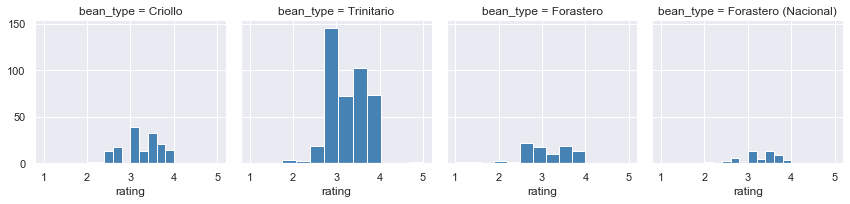

In [19]:
g = sns.FacetGrid(pop_bean, col="bean_type", margin_titles=True)
g.map(plt.hist, "rating", color="steelblue")

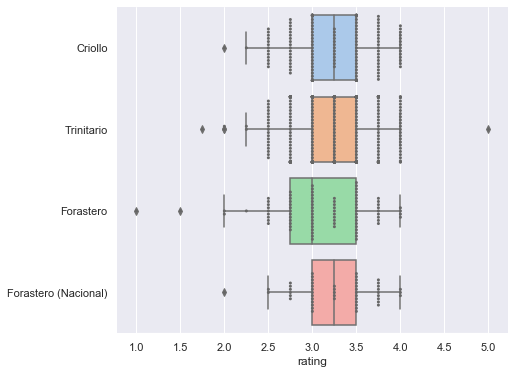

In [20]:
sns.set(style="dark", palette="pastel")
f, ax = plt.subplots(figsize=(7, 6))
sns.boxplot(y="bean_type", x="rating", data=pop_bean)
sns.swarmplot(y="bean_type", x="rating", data=pop_bean, size=3, color=".4", linewidth=0)
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

And, below, the ratings for each bean type by year:

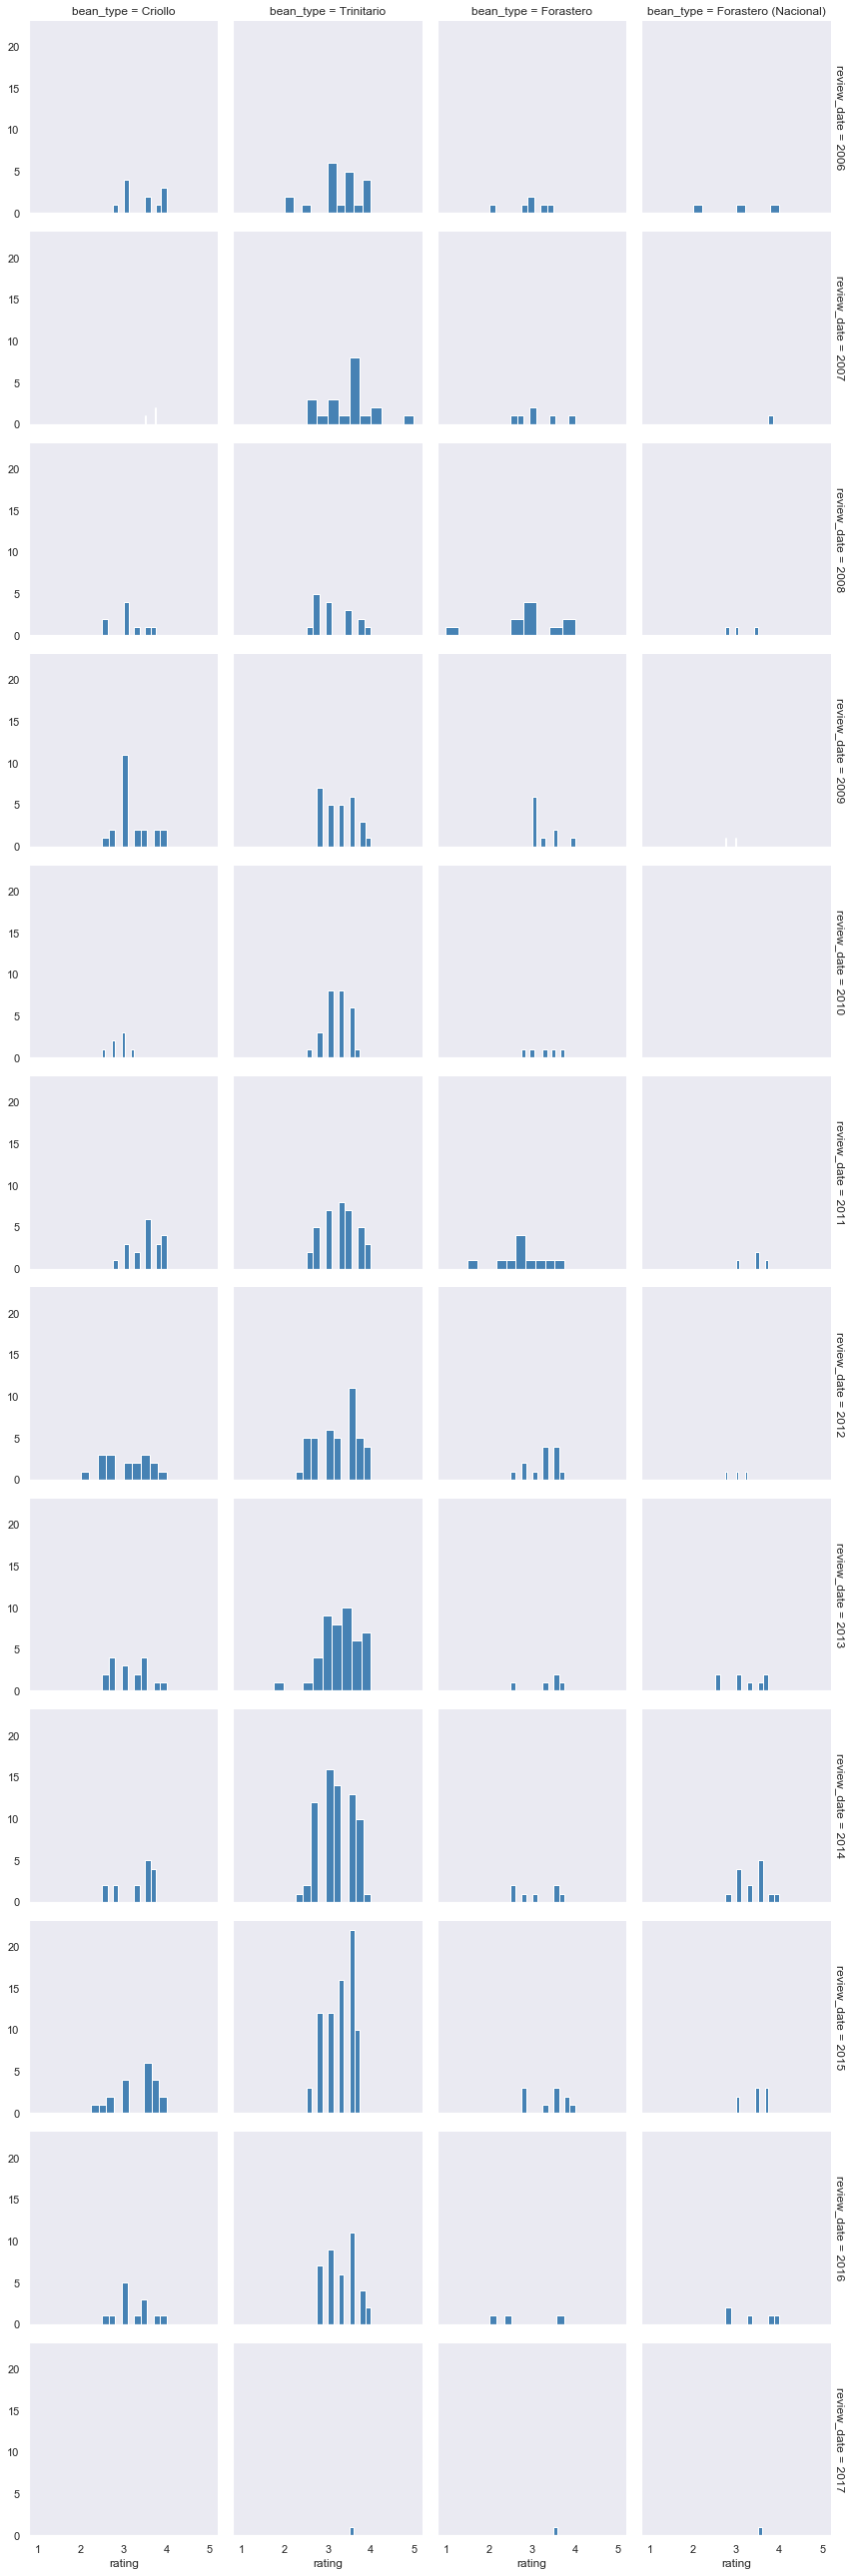

In [21]:
g = sns.FacetGrid(pop_bean, row="review_date", col="bean_type", margin_titles=True)
g.map(plt.hist, "rating", color="steelblue")

The average rating for each bean type is then:

In [22]:
types = pop_bean.bean_type.unique()
for t in types:
    print('%s: %.2f' %(t, pop_bean[pop_bean.bean_type==t].rating.mean()))

Criollo: 3.24
Trinitario: 3.25
Forastero: 3.10
Forastero (Nacional): 3.27


Forastero (Nacional) seems to have the highest average rating with criollo and trinitario close behind. Forastero has the worst ratings. Which companies use these bean types and are their average ratings representative of the bean types used?

In [23]:
forastero_n = pop_bean[pop_bean.bean_type=='Forastero (Nacional)']
forastero = pop_bean[pop_bean.bean_type=='Forastero']
criollo = pop_bean[pop_bean.bean_type=='Criollo']
trinitario = pop_bean[pop_bean.bean_type=='Trinitario']

def df_company(df):
    table = {}
    company = df.company.unique()
    
    for c in company:
        table[c] = df[df.company==c].rating.mean()

    table = pd.DataFrame(table.items(), columns=['Company', 'Rating']).sort_values('Rating', ascending=False)
    return table

In [24]:
print('Companies that use Forastero (Nacional):')
fn = df_company(forastero_n)
fn.head()

Companies that use Forastero (Nacional):


,Company,Rating
2,Bar Au Chocolat,4.00
32,Szanto Tibor,3.75
4,"Chocolate Tree, The",3.75
5,Christopher Morel (Felchlin),3.75
23,Pierre Marcolini,3.75


In [25]:
print('Average rating of companies that use Forastero (Nacional) %.2f' %fn['Rating'].mean())

Average rating of companies that use Forastero (Nacional) 3.27


In [26]:
print('Companies that use Forastero:')
f = df_company(forastero)
f.head()

Companies that use Forastero:


,Company,Rating
47,Scharffen Berger,4.00
21,Georgia Ramon,4.00
26,K'ul,3.75
54,Terroir,3.75
3,Artisan du Chocolat,3.75


In [27]:
print('Average rating of companies that use Forastero %.2f' %f['Rating'].mean())

Average rating of companies that use Forastero 3.11


In [28]:
print('Companies that use Criollo:')
c = df_company(criollo)
c.head()

Companies that use Criollo:


,Company,Rating
58,Ocelot,4.000000
81,Valrhona,4.000000
75,"Smooth Chocolator, The",3.875000
13,Cacao Sampaka,3.833333
1,Acalli,3.750000


In [29]:
print('Average rating of companies that use Criollo %.2f' %c['Rating'].mean())

Average rating of companies that use Criollo 3.19


In [30]:
print('Companies that use Trinitario:')
t = df_company(trinitario)
t.head()

Companies that use Trinitario:


,Company,Rating
0,A. Morin,4.0000
170,Tobago Estate (Pralus),4.0000
92,Idilio (Felchlin),3.8750
18,Benoit Nihant,3.8125
114,Matale,3.8125


In [31]:
print('Average rating of companies that use Trinitario %.2f' %t['Rating'].mean())

Average rating of companies that use Trinitario 3.19


This time, Criollo tied Trinitario and both their average ratings were brought down. While Forastero remains in last place and maintains its average rating of around 3.10. Companies that use forastero (Nacional), had their rating increased to 3.28!

## Origin of bean types

To understand bean types better, let's look at their origins:

In [32]:
pop_bean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 711 entries, 5 to 1792
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company           711 non-null    object 
 1   origin            711 non-null    object 
 2   ref               711 non-null    int64  
 3   review_date       711 non-null    int64  
 4   cocoa_percent     711 non-null    float64
 5   company_location  711 non-null    object 
 6   rating            711 non-null    float64
 7   bean_type         711 non-null    object 
 8   bean_origin       711 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 75.5+ KB


In [50]:
def bean_origin(bean_type):
    table = {}
    table[bean_type] = pop_bean[pop_bean.bean_type==bean_type].bean_origin.unique()
    table2 = pd.DataFrame(table)
    print('%d origins of %s:' %(table2.count(), bean_type))
    return table2

So, if I were looking to get some Forastero (Nacional) which gives the highest rated chocolate bars, I would go to these locations:

In [51]:
bean_origin('Forastero (Nacional)')

3 origins of Forastero (Nacional):


,Forastero (Nacional)
0,Ecuador
1,Peru
2,Colombia


In [52]:
bean_origin('Forastero')

15 origins of Forastero:


,Forastero
0,Brazil
1,Tanzania
2,Ghana
3,Congo
4,Sao Tome
5,Costa Rica
6,Uganda
7,Sao Tome & Principe
8,Papua New Guinea
9,West Africa


In [53]:
bean_origin('Trinitario')

35 origins of Trinitario:


,Trinitario
0,Venezuela
1,Fiji
2,Indonesia
3,Trinidad
4,Vietnam
5,Madagascar
6,Dominican Republic
7,Peru
8,Belize
9,Ecuador


In [54]:
bean_origin('Criollo')

19 origins of Criollo:


,Criollo
0,Venezuela
1,Madagascar
2,Peru
3,Mexico
4,Dominican Republic
5,Congo
6,Guatemala
7,Indonesia
8,Nicaragua
9,Honduras


# Bean type and cocoa percentage

Still using the four most popular bean types, how are their cocoa percentages distributed and how does that affect the rating? Now we will be looking at two numerical values: rating and cocoa percentage instead of just the rating. First, a simple scatter plot of all ratings against the cocoa percentage:

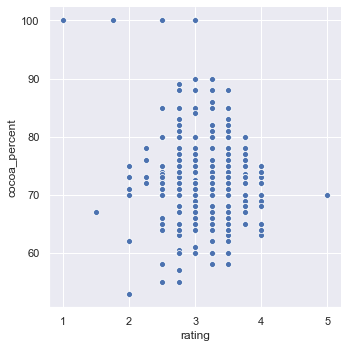

In [38]:
sns.set(style="dark", palette="deep")
sns.set_style({'axes.grid' : True})
sns.relplot(x="rating", y="cocoa_percent", data=pop_bean)

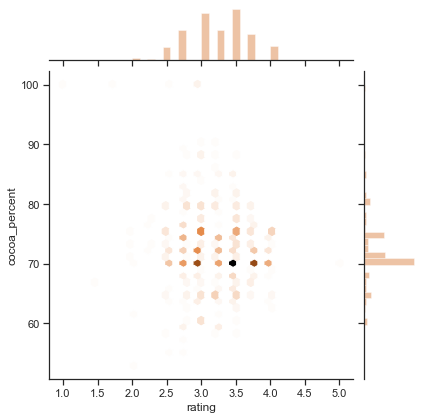

In [39]:
sns.set(style="ticks")
sns.jointplot(x="rating", y="cocoa_percent", kind='hex', data=pop_bean, color="chocolate")

Cocoa percentage is highly subjective based on the above graph. At 70% cocoa, the ratings can go anywhere from 2.5 to 4. How many different cocoa percentages are there? And what are the most popular chocolate percentages?

In [40]:
print(pop_bean.cocoa_percent.nunique())

37


In [41]:
percentages = pop_bean.cocoa_percent.unique()
percent_table = {}

for p in percentages:
    percent_table[p] = pop_bean[pop_bean.cocoa_percent==p].rating.mean()
    
pop_percentage = pd.DataFrame(percent_table.items(), columns=['Percent', 'Rating']).sort_values('Rating', ascending=False)
pop_percentage.head()

,Percent,Rating
19,69.0,3.583333
32,63.0,3.416667
0,70.0,3.340909
11,68.0,3.312500
8,73.0,3.279412


The least popular cocoa percentages:

In [42]:
pop_percentage.tail()

,Percent,Rating
33,72.5,2.750
36,89.0,2.750
29,55.0,2.625
22,100.0,2.375
34,53.0,2.000


How do these values change for each bean type?

In [43]:
from IPython.display import display_html

def styler(df, caption):
    df_styler = df.style.set_table_attributes("style='display:inline'").set_caption(caption)
    return df_styler

def best_percentage(bean_type):
    p_small = pop_bean[pop_bean.bean_type==bean_type]
    percentages = p_small.cocoa_percent.unique()
    percent_table = {}

    for p in percentages:
        percent_table[p] = p_small[p_small.cocoa_percent==p].rating.mean()

    pop_percentage = pd.DataFrame(percent_table.items(), columns=['Percent', 'Rating']).sort_values('Rating', ascending=False).head()
    return styler(pop_percentage, bean_type)

def worst_percentage(bean_type):
    p_small = pop_bean[pop_bean.bean_type==bean_type]
    percentages = p_small.cocoa_percent.unique()
    percent_table = {}

    for p in percentages:
        percent_table[p] = p_small[p_small.cocoa_percent==p].rating.mean()

    pop_percentage = pd.DataFrame(percent_table.items(), columns=['Percent', 'Rating']).sort_values('Rating').head()
    return styler(pop_percentage, bean_type)

In [44]:
fn = best_percentage('Forastero (Nacional)')
f = best_percentage('Forastero')
t = best_percentage('Trinitario')
c = best_percentage('Criollo')

display_html(fn._repr_html_()+f._repr_html_()+t._repr_html_()+c._repr_html_(), raw=True)

,Percent,Rating
15,78.000000,3.750000
3,69.000000,3.750000
7,73.000000,3.750000
14,62.000000,3.500000
11,82.000000,3.500000
,Percent,Rating
8,73.500000,3.750000
4,82.000000,3.500000
7,68.000000,3.375000
17,65.000000,3.321429


Forastero (Nacional), Forastero, and Criollo with percentages of 78, 73.5, and 76 respectively all tie with a rating of 3.75. Forastero (Nacional) has lots of different percentages rated at 3.75, but they're all within 69-78.

In [45]:
fn = worst_percentage('Forastero (Nacional)')
f = worst_percentage('Forastero')
t = worst_percentage('Trinitario')
c = worst_percentage('Criollo')

display_html(fn._repr_html_()+f._repr_html_()+t._repr_html_()+c._repr_html_(), raw=True)

,Percent,Rating
16,53.000000,2.000000
12,100.000000,2.500000
4,88.000000,2.750000
9,76.000000,3.000000
6,85.000000,3.000000
,Percent,Rating
9,100.000000,1.000000
21,62.000000,2.000000
5,78.000000,2.250000
16,72.500000,2.500000


In [8]:
# choco_clean.info()

In [7]:
# choco_clean.head()

In [6]:
# a = choco_clean.bean_origin.unique()
# max_len = max([len(i) for i in a])
# print(max_len)